Q1b)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
import math
def QR_decomposed(A):
  a=A.T
  u=np.zeros(np.shape(a))
  q=np.zeros(np.shape(a))
  u[0]=a[0]
  q[0]=u[0]/math.sqrt(np.dot(u[0],u[0]))
  for i in range(1,len(a)):
    u[i]=a[i]
    for j in range(i):
      #print(q[j])
      #print(a[i])
      u[i]-=np.dot(q[j],a[i])*q[j]
    q[i]=u[i]/math.sqrt(np.dot(u[i],u[i]))
  r=np.zeros(np.shape(A))
  for i in range(0,len(r)):
    for j in range(i,len(r[i])):
      if j==i:
        r[i][j]=math.sqrt(np.dot(u[i],u[i]))
      else:
        r[i][j]=np.dot(q[i],a[j])
  return q.T,r
A_1_b=np.array([[1,4,8,4],[4,2,3,7],[8,3,6,9],[4,7,9,2]])
q_1_b,r_1_b=QR_decomposed(A_1_b)
print('Q: ',end='')
pprint(q_1_b)
print("R: ",end='')
pprint(r_1_b)
print("A: ",end='')
pprint(q_1_b@r_1_b)

Q: array([[ 0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
       [ 0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
       [ 0.81227693, -0.38092692,  0.22995024, -0.37712564],
       [ 0.40613847,  0.72910447, -0.5208777 , -0.17928924]])
R: array([[ 9.8488578 ,  6.49821546, 10.55960012, 11.37187705],
       [ 0.        ,  5.98106979,  8.4234836 , -0.484346  ],
       [ 0.        ,  0.        ,  2.74586406,  3.27671222],
       [ 0.        ,  0.        ,  0.        ,  3.11592335]])
A: array([[1., 4., 8., 4.],
       [4., 2., 3., 7.],
       [8., 3., 6., 9.],
       [4., 7., 9., 2.]])


Q1c

In [ ]:
def check_non_diagonal(A,err=1e-6):
    for i in range(len(A)):
      for j in range(len(A[i])):
        if i!=j and A[i][j]>err:
          return False
    return True
def eigen(A,err=1e-6):
  a=A.copy()
  v=np.eye(len(a))
  while check_non_diagonal(a,err)!=True:
    q,r=QR_decomposed(a)
    v=v@q
    a=r@q
  return v,a
v,d=eigen(A_1_b)
pprint(v)
pprint(d)

array([[ 0.43151698, -0.38357064, -0.77459666, -0.25819889],
       [ 0.38357063,  0.43151698, -0.2581989 ,  0.77459667],
       [ 0.62330228,  0.52740965,  0.25819889, -0.51639778],
       [ 0.52740965, -0.62330227,  0.51639779,  0.25819889]])
array([[ 2.10000000e+01,  7.36067998e-07,  3.61411892e-14,
        -2.53428712e-14],
       [ 7.36067998e-07, -8.00000000e+00,  5.99038954e-08,
         4.91834261e-15],
       [ 1.76373367e-14,  5.99038974e-08, -3.00000000e+00,
        -2.06493931e-08],
       [ 5.69063112e-23,  9.58659066e-16, -2.06493983e-08,
         1.00000000e+00]])


2a)<br>
$\Sigma_{n=1}^{\infty}\psi_n\int_0^Lsin\frac{\pi m x}{L}\hat H sin\frac{\pi nx}{L}dx$<br>
$=\int_0^Lsin\frac{\pi mx}{L}\hat H\psi(x)dx$<br>
$=E\Sigma_{n=1}^{\infty}\int_0^Lsin\frac{\pi mx}{L}sin\frac{\pi nx}{L}\psi_ndx$<br>
$=\frac{L}{2}E\psi_m$<br>
$H_{mn}=E\psi_m\delta_{mn}$ (no sum against repetive index) <br>
$\mathbf{H\boldsymbol{\psi}}=\Sigma_{n=1}^{\infty}E\psi_m\delta_{mn}\psi_{n}$<br>
$=\Sigma_{n=1}^{\infty}E\psi_{m}$ <br>
$=E\boldsymbol{\psi}$

2b) (Correction Needed)<br>
$H_{mn}=\frac{2}{L}\int_0^Lsin\frac{\pi mx}{L}[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2}+\frac{ax}{L}]sin\frac{\pi nx}{L}dx$<br>
$=\frac{2}{L}[\frac{\hbar^2}{2M}(\frac{\pi n}{L})^2\int_0^Lsin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx+\frac{a}{L}\int_0^Lxsin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx$<br>
$=\frac{\hbar^2\pi^2n^2}{2ML^2}\delta_{mn}+2a\int_0^Lxsin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx$<br>
$H_{mn}=-2a(\frac{2L}{\pi})^2\frac{mn}{(m^2-n^2)^2}$ if $m\neq n$ and one is even, one is odd<br>
$H_{mn}=\frac{\hbar^2\pi^2n^2}{2ML^2}+a\frac{L^2}{2}$ if $m=n$<br>
$H_{mn}=0$ otherwise

In [ ]:
def H(m,n):
  L=5e-10
  M=9.1094e-31
  a=10*1.6022e-19
  hbar=1.055e-34
  if m==n:
    return hbar*hbar*(math.pi**2)*n*n/(2*M*L*L)+a*L*L/2
  else:
    if (m%2==0 and n%2==1) or (m%2==1 and n%2==0):
      return -2*a*((2*L/math.pi)**2)*m*n/((m*m-n*n)*(m*m-n*n))
    else:
      return 0

Q2c) (Correction Needed)

In [ ]:
H_2=np.zeros((10,10))
for m in range(10):
  for n in range(10):
    H_2[m,n]=H(m+1,n+1)
eign,v=np.linalg.eig(H_2)
#pprint(H_2)
eign/=1.6022e-19
print(np.sort(eign))

[  1.50531767   6.02127069  13.54785905  24.08508276  37.63294181
  54.1914362   73.76056595  96.34033103 121.93073146 150.53176724]


2d)

In [ ]:
H_2_d=np.zeros((100,100))
for m in range(100):
  for n in range (100):
    H_2_d[m,n]=H(m+1,n+1)
eign,v=np.linalg.eig(H_2_d)
eign/=1.6022e-19
print(np.sort(eign)[:10])
print('the accuracy is high')

[  1.50531767   6.02127069  13.54785905  24.08508276  37.63294181
  54.1914362   73.76056595  96.34033103 121.93073146 150.53176724]
the accuracy is high


2e)

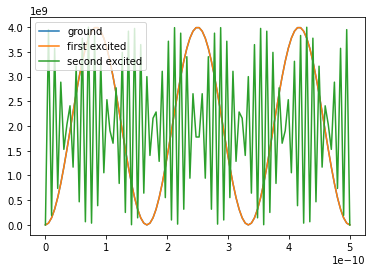

In [ ]:
def legendre_root_w(n):
  x=[]
  for i in range(n):
    x.append(math.cos(math.pi*(i-0.25)/(n+0.5)))
  x=np.array(x)
  epsilon=1e-15
  delta=1
  while delta>epsilon:
    p0=np.ones(n,float)
    p1=np.copy(x)
    for i in range(1,n):
      p0,p1=p1,((2*i+1)*p1*x-p0*i)/(i+1)
    dp=(n+1)*(p0-x*p1)/(1-x*x)
    dx=p1/dp
    x=x-dx
    delta=max(abs(dx))
  w=2*(n+1)*(n+1)/(n*n*(1-x*x)*dp*dp)
  return x,w
def gauss_quad(func,n,low,up):
  x,w=legendre_root_w(n)
  #print(x)
  #print(w)
  x=0.5*(up-low)*x+0.5*(up+low)
  w=0.5*(up-low)*w
  ans=0
  for i in range(n):
    ans+=func(x[i])*w[i]
    #print(i,ans,x[i],w[i])
  return ans
def psi(k,x):
  re=np.argpartition(eign,k)
  p=v[re[-1]]
  #print(p)
  ans=0
  L=5e-10
  for i in range(len(p)):
    ans+=math.sin(math.pi*(i+1)*x/L)*p[i]
  return ans
def norm(k):
  L=5e-10
  def f_2(x):
    return psi(k,x)*psi(k,x)
  return gauss_quad(f_2,100,0,L)
L=5e-10
x_2=np.linspace(0,L,100)
psi1=[]
n1=norm(1)
for i in x_2:
  psi1.append((psi(1,i)**2)/n1)
psi2=[]
n2=norm(2)
for i in x_2:
  psi2.append((psi(2,i)**2)/n2)
psi3=[]
n3=norm(3)
for i in x_2:
  psi3.append((psi(3,i)**2)/n3)
plt.plot(x_2,psi1)
plt.plot(x_2,psi2)
plt.plot(x_2,psi3)
plt.legend(['ground','first excited','second excited'],loc='upper left')
#print(psi1)
#print(psi2)
#print(psi3)

3a)<br>
$x'=(1+\omega)f(x)-\omega x$<br>
$=(1+\omega)[f(x^*)+(x-x^*)f'(x)]-\omega x$    (for $x$ close to $x^*$)<br>
$=x^*+\omega x^*+(1+\omega)(x-x^*)f'(x)-\omega x$<br>
$x'-x^*=(1+\omega)(x-x^*)f'(x)-\omega (x-x^*)$<br>
$\varepsilon'=\varepsilon [(1+\omega)f'(x)-\omega]$<br>
$x^*=x+\varepsilon=x'+\varepsilon'=x'+\varepsilon [(1+\omega)f'(x)-\omega]$<br>
$\varepsilon'=\frac{x-x'}{1-1/[(1+\omega)f'(x)-\omega]}$

3b and c)

In [ ]:
def f_3_b(x):
  c=2
  return 1-math.exp(-1*c*x)
def relax(func,x_begin,err=1e-6):
  x=x_begin
  ans=[x_begin]
  error=999
  while error>err:
    x_p=func(x)
    ans.append(x_p)
    error=abs(x_p-x)
    x=x_p
  return ans
def overrelax(func,x_begin,omega=0.5,err=1e-6):
  x=x_begin
  ans=[x_begin]
  error=999
  while error>err:
    x_p=(1+omega)*func(x)-omega*x
    ans.append(x_p)
    error=abs(x_p-x)
    x=x_p
  return ans
print('relax: '+str(relax(f_3_b,1)))
print('overrelax: '+str(overrelax(f_3_b,1)))

relax: [1, 0.8646647167633873, 0.8225966691808597, 0.8070247503317746, 0.8009201942366403, 0.7984747083247583, 0.7974866394625985, 0.797086049491047, 0.796923413762181, 0.7968573480008734, 0.7968305046795713, 0.7968195968986895, 0.7968151643557075, 0.7968133630966887, 0.7968126311118457]
overrelax: [1, 0.796997075145081, 0.7968323724281932, 0.7968143476015649, 0.7968123729832619, 0.7968121566399141]


d) Yes. Sometimes $\Delta x$ is too large.We use a negative $\omega$ to reduce the overshoot of $x$.(i.e., Some times $x^*$ is between $x$ and $x+\Delta x$. Using $x'=x+(1+\omega)\Delta x$ with negative $\omega$ helps the algorithm to run faster.

4a)<br>
Substitute $x=b, y=\frac{b}{a+b^2}$ into the equations, <br>
$-x+ay+x^2y=-b+\frac{ab}{a+b^2}+\frac{b^3}{a+b^2}=0$<br>
$b-ay-x^2y=b-\frac{ab}{a+b^2}-\frac{b^3}{a+b^2}=0$

4b)<br>
$-x+ay+x^2y=0$<br>
$x=ay+x^2y=y(a+x^2)$,<br>
$b-ay-x^2y=0$<br>
$y=\frac{b}{a+x^2}$

In [ ]:
def x_4_b(x,y):
  a=1
  b=2
  return y*(a+x*x)
def y_4_b(x,y):
  a=1
  b=2
  return b/(a+x*x)
def relax_conv(func_x,func_y,x_begin,y_begin,err=1e-6):
  x=x_begin
  y=y_begin
  ans_x=[x_begin]
  ans_y=[y_begin]
  error_x=999
  error_y=999
  loop=0
  while error_x>err or error_y>err:
    x_p=func_x(x,y)
    y_p=func_y(x,y)
    error_x=abs(x_p-x)
    error_y=abs(y_p-y)
    loop+=1
    #print('x_p: '+str(x_p)+', y_p: '+str(y_p)+', loop: '+str(loop)+', error_x: '+str(error_x)+', error_y: '+str(error_y))
    if loop>=100:
      break
    ans_x.append(x_p)
    ans_y.append(y_p)
    x=x_p
    y=y_p
  return ans_x, ans_y
x_4,y_4=relax_conv(x_4_b,y_4_b,1,1)
print('x: '+str(x_4))
print('y: '+str(y_4))

x: [1, 2, 5.0, 10.4, 8.396923076923079, 1.310156049097899, 0.0759774241902131, 0.7404890733011719, 3.0788751163466825, 13.536535665652755, 35.161656645088655, 13.432011374622395, 0.2932397270847742, 0.011972174459708588, 1.8419023358662185, 8.783949400259472, 35.58607297317904, 32.431033721243125, 1.661350860079516, 0.007143212139370495, 0.5319297721101206, 2.5657676453894274, 11.821455008110393, 37.120865576687, 19.59488493909098, 0.5583336565748717, 0.006814932055488183, 1.524767305928694, 6.649521848727193, 27.19837122492449, 32.76491022494376, 2.9012144856736284, 0.017527595544205514, 0.21244608353391248, 2.089624709407675, 10.269563181932499, 39.676997856972335, 29.592448621959115, 1.1130996797794412, 0.0051076939835163725, 0.8932828532906328, 3.5958147024182177, 15.495258934172025, 34.616664470408445, 9.948554876076166, 0.16671828931348773, 0.02056129830917014, 1.9467360294158578, 9.575514125184863, 38.70342610910898, 32.343242628216515, 1.3970869161247754, 0.005638225898100457, 

4c)<br>
$y=\frac{x}{a+x^2}$<br>
$x=\sqrt{\frac{b}{y}-a}$

In [ ]:
def x_4_c(x,y):
  a=1
  b=2
  return math.sqrt(b/y-a)
def y_4_c(x,y):
  a=1
  b=2
  return x/(a+x*x)
x_4,y_4=relax_conv(x_4_c,y_4_c,1,1)
print('x: '+str(x_4))
print('y: '+str(y_4))

x: [1, 1.0, 1.7320508075688772, 1.7320508075688772, 1.902314945932194, 1.902314945932194, 1.9636650714924069, 1.9636650714924069, 1.9864122863201303, 1.9864122863201303, 1.9949097477571613, 1.9949097477571613, 1.9980918687165672, 1.9980918687165672, 1.9992845505793713, 1.9992845505793713, 1.9997317204769791, 1.9997317204769791, 1.9998993971476058, 1.9998993971476058, 1.9999622742071335, 1.9999622742071335, 1.9999858528665935, 1.9999858528665935, 1.9999946948304455, 1.9999946948304455, 1.9999980105621868, 1.9999980105621868]
y: [1, 0.5, 0.5, 0.43301270189221935, 0.43301270189221935, 0.4118632672940252, 0.4118632672940252, 0.40438075610800917, 0.40438075610800917, 0.40163345114218674, 0.40163345114218674, 0.400611243354449, 0.400611243354449, 0.4002290339314792, 0.4002290339314792, 0.40008586211625663, 0.40008586211625663, 0.40003219469412865, 0.40003219469412865, 0.40001207250421084, 0.40001207250421084, 0.4000045271179152, 0.4000045271179152, 0.400001697659211, 0.400001697659211, 0.400

5a)<br>
Net force on the satellite: $\frac{GMm_s}{r^2}-\frac{Gmm_s}{(R-r)^2}$<br>
Centripetal force needed for the satellite: $m_s\omega^2 r$<br>
$\frac{GMm_s}{r^2}-\frac{Gmm_s}{(R-r)^2}=m_s\omega^2 r$,<br>
$\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}=\omega^2 r$

5b)





In [ ]:
def f_5_x(x):
  G=6.674e-11
  M=5.974e24
  m=7.348e22
  R=3.844e8
  w=2.662e-6
  return G*M/(x*x)-G*m/((R-x)*(R-x))-w*w*x
def f_5_p_x(x):
  G=6.674e-11
  M=5.974e24
  m=7.348e22
  R=3.844e8
  w=2.662e-6
  k1= -2* G*M/(x*x*3)-w*w
  k2=-2*G*m/((R-x)*(R-x)*(R-x))*(-1)
  return k1-k2
def newton(func, func_p,x_begin,err=1e-6):
  x=x_begin
  error=999
  while error>err:
    before=x
    x=x-func(x)/func_p(x)
    error=abs(x-before)
    #print(x)
  return x
print('lagrange point: '+str(newton(f_5_x,f_5_p_x,3.26e8,err=1e-3)))

lagrange point: 326013579.55160785


Q6a)<br>

$\frac{V_+-V_2}{R_3}-\frac{V_2}{R_4}+I_0[e^{(V_1-V_2)/V_r}-1]=0$

Q6b)


In [ ]:
def V1(v1,v2):
  V_pl=5
  r1=1000
  r2=4000
  r3=3000
  r4=2000
  vt=0.05
  i0=3e-9
  #print(v1,v2)
  #return (-i0*(math.exp((v1-v2)/vt)-1)+V_pl/r1)/(1/r1+1/r2)
  return math.log((v2/r4+(V_pl-v2)/r4)/i0+1)*vt+v2
def V2(v1,v2):
  V_pl=5
  r1=1000
  r2=4000
  r3=3000
  r4=2000
  vt=0.05
  i0=3e-9
  #return (V_pl/r3+i0*(math.exp((v1-v2)/vt)-1))/(1/r3+1/r4)
  return v1-math.log(((v1-V_pl)/r1+v1/r2)/i0+1)*vt
def relax_conv_6(func_x,func_y,x_begin,y_begin,err=1e-6):
  x=x_begin
  y=y_begin
  ans_x=[x_begin]
  ans_y=[y_begin]
  error_x=999
  error_y=999
  #loop=0
  while error_x>err or error_y>err:
    x_p=func_x(x,y)
    y_p=func_y(x,y)
    error_x=abs(x_p-x)
    error_y=abs(y_p-y)
    #loop+=1
    #print('x_p: '+str(x_p)+', y_p: '+str(y_p)+', loop: '+str(loop)+', error_x: '+str(error_x)+', error_y: '+str(error_y))
    #if loop>=100:
      #break
    ans_x.append(x_p)
    ans_y.append(y_p)
    x=x_p
    y=y_p
  return ans_x, ans_y
p6,q6=relax_conv_6(V1,V2,6,5.5)
print(p6[-1])
print(q6[-1])
print('the result agree with the rule (the difference is approximately 0.6V)')

6.00000097849277
5.31834048994152
the result agree with the rule (the difference is approximately 0.6V)


7a)

Text(0, 0.5, 'efficiency')

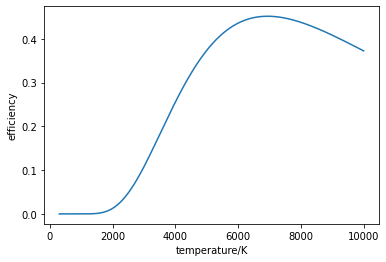

In [ ]:
def f_7_a(x):
  return x*x*x/(math.exp(x)-1)
def eta_7(T):
  h=6.626e-34
  c=3e8
  k=1.38e-23
  lambda1=390e-9
  lambda2=750e-9
  return 15/(math.pi**4)*gauss_quad(f_7_a,100,h*c/(lambda2*k*T),h*c/(lambda1*k*T))
y_7=[]
x_7=np.linspace(300,10000,1000)
for i in x_7:
  y_7.append(eta_7(i))
plt.plot(x_7,y_7)
plt.xlabel('temperature/K')
plt.ylabel('efficiency')

7b)

In [ ]:
def gold_sec_search_max(func,low,up,err=1):
  gold_ratio=(math.sqrt(5)+1)/2
  x=up-(up-low)/gold_ratio
  y=low+(up-low)/gold_ratio
  while abs(up-low)>err:
    if func(x)>func(y):
      up=x
    else:
      low=y
    x=up-(up-low)/gold_ratio
    y=low+(up-low)/gold_ratio
  return (up+low)/2
print('most efficient temperature: '+str(gold_sec_search_max(eta_7,300,10000)))

NameError: ignored

7c) No. The filament would melt at this temperature